# Imports

In [1]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 9.0 MB/s eta 0:00:00


In [2]:
# PyTorch
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
from torchvision.transforms.v2 import ToTensor

# Plotting Libraries
import matplotlib.pyplot as plt

# Metrics
from torchmetrics import Accuracy

# Progress bar
from tqdm.auto import tqdm

# Timers
from timeit import default_timer as timer

In [3]:
# device agnostic code

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"The current device: {device}")

The current device: cpu


# Utility functions

In [4]:
# Training time calculation

def train_time(start, end, device = device)-> int:

  """
  Parameters:
    start : Model training starting time
    end : Model training ending time
    device : The device where model trained on
  Returns:
    time (int) : Total training time
  Side Effects:
    printing the total training time on terminal
  """

  train_time = end - start

  print(f"The total training time is: {train_time} seconds")

  return train_time

In [5]:
# Plotting losses and accuracy

def plot_logs(logs):


  plt.plot(logs["epochs"],  logs["train_loss"], label = "Train loss")
  plt.plot(logs["epochs"],  logs["test_loss"], label = "Test loss")
  plt.plot(logs["epochs"],  logs["accuracy"], label = "Accuracy")
  plt.xlabel("Epochs")
  plt.title("Training logs")
  plt.legend(prop = {"size": 12})

In [6]:
# Trainer

def trainer(model, epochs, train_data_loader, test_data_loader, loss_fn, optimizer, acc_fn):

  # Logger
  start_train_time = timer()
  epoch_count = []
  loss_train = []
  loss_test = []
  acc_test = []




  # Epochs
  for epoch in tqdm(range(epochs)):

    print(f"Epochs: {epoch}\n----")

    # Resetting train loss
    train_loss = 0

    # Training
    for batch, (x, y) in enumerate(train_data_loader):

      # Train mode
      model.train()

      # Forward
      y_pred = model(x)

      # Calculate loss - accumulating over batches
      loss =  loss_fn(y_pred, y)
      train_loss += loss

      # Reset optimizer
      optimizer.zero_grad()

      # Loss backward
      loss.backward()

      # Optimizer step
      optimizer.step()

      # side effect
      if batch %150 ==0:
        print(f"{batch * len(x) } / {len(train_data)} samples")

    # Training loss
    train_loss /= len(train_data_loader)

    # Testing

    test_loss, test_acc = 0, 0

    # Eval
    model.eval()

    # Inference mode
    with torch.inference_mode():

      # Batch testing
      for x,y in test_data_loader:

        # Forward pass
        y_pred = model(x)

        # Calculate loss
        test_loss += loss_fn(y_pred, y)

        # Calculate accuracy
        test_acc += acc_fn(y_pred.argmax(dim = 1), y)

      # Test loss and Accuracy for entire batch
      test_loss /= len(test_data_loader)
      test_acc /= len(test_data_loader)

    # Logging every epoch
    epoch_count.append(epoch)
    loss_train.append(train_loss.item())
    loss_test.append(test_loss.item())
    acc_test.append(test_acc)



    print(f"Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | Accuracy (test) : {test_acc:.2f}%")


  # End of training
  end_train_time = timer()
  trained_time = train_time(start_train_time, end_train_time)

  return { "model" : model, "train_loss": loss_train, "epochs": epoch_count, "test_loss": loss_test, "accuracy" : acc_test, "Trained_time": trained_time}


# Preparing Data

In [7]:
# Importing data

train_data = FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

class_labels = train_data.classes
num_of_labels = len(class_labels)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


100%|██████████| 26.4M/26.4M [00:01<00:00, 17.6MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 297kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.63MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 17.5MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## EDA

In [8]:
image, label  = train_data[0]

image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [9]:
image.shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

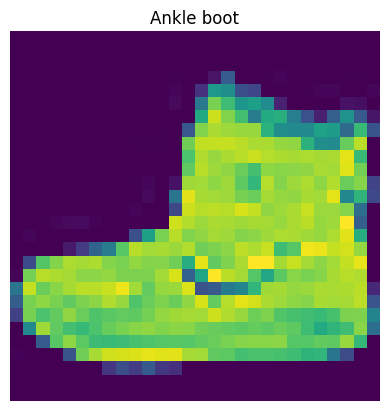

In [10]:
# Visualise the data

plt.imshow(image.squeeze())
plt.axis(False)
plt.title(class_labels[label])

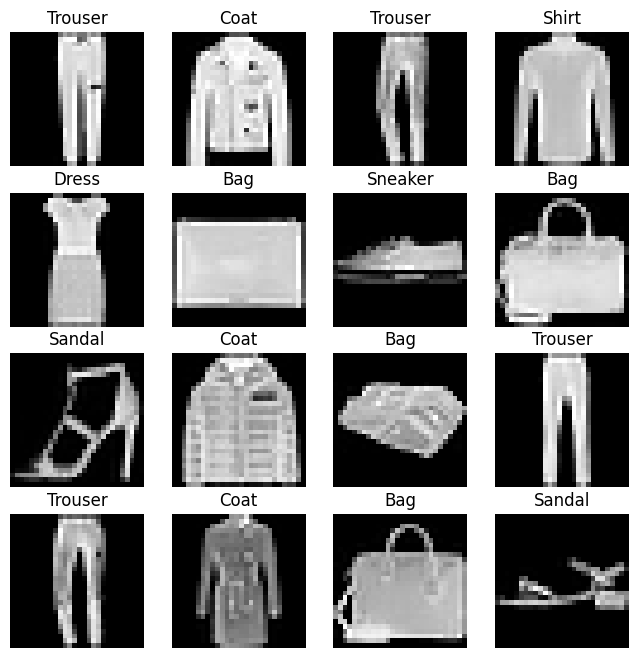

In [ ]:
# Random data

plt.figure(figsize = (8,8))

for i in range(1, 17):
  random_idx = torch.randint(low = 0, high = len(train_data), size = [1]).item()
  image, label = train_data[random_idx]
  plt.subplot(4, 4, i)
  plt.imshow(image.squeeze())
  plt.title(class_labels[label])
  plt.axis(False)


## Data Loader


In [ ]:
# Train data loader

batch_size = 32

train_data_loader = DataLoader(train_data, batch_size = batch_size, shuffle = True)

# Test data loader

test_data_loader = DataLoader(test_data, batch_size = batch_size, shuffle = False)

In [ ]:
print(f"The total number of batches in train data: {len(train_data_loader)}, \nThe total number of batches in test data: {len(test_data_loader)}.")

The total number of batches in train data: 1875, 
The total number of batches in test data: 313.


# Model 1: Model without Non linearity

## Model Building

In [ ]:
# Model Creation

class FashionMNISTv1(nn.Module):

  def __init__(self, in_features, out_features, hidden_layers):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = in_features, out_features = hidden_layers),
        nn.Linear(in_features = hidden_layers, out_features = hidden_layers),
        nn.Linear(in_features = hidden_layers, out_features = out_features)
    )

  def forward(self, x):
    return self.layer_stack(x)


In [ ]:
# Initialisation of the model
torch.manual_seed(42)
## flatten will 28 *28 *1 = 784
model = FashionMNISTv1(in_features = 784, out_features = num_of_labels, hidden_layers = 10 )

In [ ]:
# Optimizer

optimizer = torch.optim.SGD(params = model.parameters(), lr =0.1)

# Loss function

loss_fn = nn.CrossEntropyLoss()

# Metrics

acc_fn = Accuracy(task = "multiclass", num_classes = num_of_labels)

## Training

  0%|          | 0/10 [00:00<?, ?it/s]

Epochs: 0
----
0 / 60000 samples
4800 / 60000 samples
9600 / 60000 samples
14400 / 60000 samples
19200 / 60000 samples
24000 / 60000 samples
28800 / 60000 samples
33600 / 60000 samples
38400 / 60000 samples
43200 / 60000 samples
48000 / 60000 samples
52800 / 60000 samples
57600 / 60000 samples
Train loss: 0.62896 | Test loss: 0.52558 | Accuracy (test) : 0.81%
Epochs: 1
----
0 / 60000 samples
4800 / 60000 samples
9600 / 60000 samples
14400 / 60000 samples
19200 / 60000 samples
24000 / 60000 samples
28800 / 60000 samples
33600 / 60000 samples
38400 / 60000 samples
43200 / 60000 samples
48000 / 60000 samples
52800 / 60000 samples
57600 / 60000 samples
Train loss: 0.49376 | Test loss: 0.50046 | Accuracy (test) : 0.83%
Epochs: 2
----
0 / 60000 samples
4800 / 60000 samples
9600 / 60000 samples
14400 / 60000 samples
19200 / 60000 samples
24000 / 60000 samples
28800 / 60000 samples
33600 / 60000 samples
38400 / 60000 samples
43200 / 60000 samples
48000 / 60000 samples
52800 / 60000 samples
576

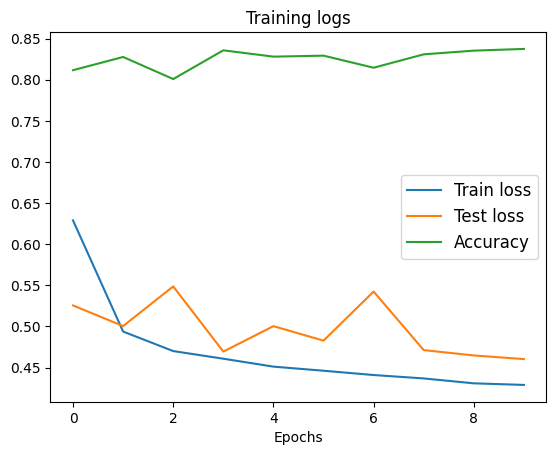

In [ ]:
logs = trainer(model , 10, train_data_loader, test_data_loader, loss_fn, optimizer, acc_fn)

plot_logs(logs)

# Model 2: Non Linear activation

## Model building

In [ ]:
# Model with non linear activation

class FashionMNISTv2(nn.Module):

  def __init__(self, in_features, out_features, hidden_layers):

    super().__init__()

    self.layer_stack = nn.Sequential(
                          nn.Flatten(),
                          nn.Linear(in_features = in_features, out_features = hidden_layers),
                          nn.ReLU(),
                          nn.Linear(in_features = hidden_layers, out_features = hidden_layers),
                          nn.ReLU(),
                          nn.Linear(in_features = hidden_layers, out_features = out_features)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
# Model initialisation
torch.manual_seed(42)
model = FashionMNISTv2(in_features = 784, out_features = num_of_labels, hidden_layers = 10)


# Optimizer
optimizer = torch.optim.SGD(params = model.parameters(), lr =0.1)

# Loss function
loss_fn = nn.CrossEntropyLoss()

# Accuracy function
acc_fn = Accuracy(task = "multiclass", num_classes= num_of_labels)




## Training

In [ ]:
# Training for 10 epochs

logs2 = trainer(model, 10, train_data_loader, test_data_loader, loss_fn, optimizer, acc_fn)

  0%|          | 0/10 [00:00<?, ?it/s]

Epochs: 0
----
0 / 60000 samples
4800 / 60000 samples
9600 / 60000 samples
14400 / 60000 samples
19200 / 60000 samples
24000 / 60000 samples
28800 / 60000 samples
33600 / 60000 samples
38400 / 60000 samples
43200 / 60000 samples
48000 / 60000 samples
52800 / 60000 samples
57600 / 60000 samples
Train loss: 0.67940 | Test loss: 0.54423 | Accuracy (test) : 0.81%
Epochs: 1
----
0 / 60000 samples
4800 / 60000 samples
9600 / 60000 samples
14400 / 60000 samples
19200 / 60000 samples
24000 / 60000 samples
28800 / 60000 samples
33600 / 60000 samples
38400 / 60000 samples
43200 / 60000 samples
48000 / 60000 samples
52800 / 60000 samples
57600 / 60000 samples
Train loss: 0.49702 | Test loss: 0.47315 | Accuracy (test) : 0.83%
Epochs: 2
----
0 / 60000 samples
4800 / 60000 samples
9600 / 60000 samples
14400 / 60000 samples
19200 / 60000 samples
24000 / 60000 samples
28800 / 60000 samples
33600 / 60000 samples
38400 / 60000 samples
43200 / 60000 samples
48000 / 60000 samples
52800 / 60000 samples
576

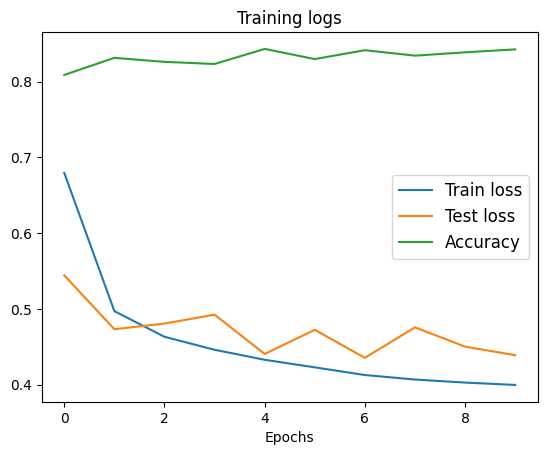

In [ ]:
plot_logs(logs2)

# Model 3 : Convolutional neural networl